In [2]:
import numpy as np 
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from util.plotting import *
from src.sampling.Sampling import sampling_sndl

# With Loss of Binary Logistic Regression

In [ ]:
### #ntwk_list = ['Caltech36', 'UCLA26', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
ntwk_list = ['Caltech36', 'UCLA26']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

In [ ]:
'''
Here you can try my updated sndl_equalEdge function to get a balanced sample_size_list automatically by 
just setting the parameter base_sample_size (the samplesize for the first graph).
'''

# sample_size_list = [500, 500]
W, beta, H = sndl_equalEdge(graph_list, base_sample_size=600, k=25, xi=7, n_components=16, iter = 250)

In [ ]:
print(f"This is W's shape: {W.shape}")
print(f"This is beta's shape: {beta.shape}")
print(f"This is H's shape: {H.shape}")

print(f"\nThis is beta {beta}")

In [ ]:
## Visualize dictionaries
display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA', W=W, regression_coeff=beta.T, fig_size=[10,10], plot_graph_only=True)

In [ ]:
b = beta[0, :]
importance = b
idx = np.argsort(importance)
idx = np.flip(idx)

print(b[idx])

In [ ]:
### Harvard1, MIT8, Caltech36, UCLA26, 'bn-mouse_retina_1', 'bn-mouse-kasthuri_graph_v4'
path = "data/" + "MIT8" + '.txt'
G3 = nn.NNetwork()
G3.load_add_edges(path, increment_weights=False, use_genfromtxt=True)

prob_ = sndl_predict(G3, W, beta, 500)

prob = np.insert(prob_, 0, 1-np.sum(prob_))
print(f"This is the predicted probability distribution: \n{prob}")

# With Loss of Multiclass Logistic Regression

In [3]:
### #ntwk_list = ['Caltech36', 'UCLA26', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
ntwk_list = ['Caltech36', 'UCLA26', 'MIT8', 'Harvard1']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

In [5]:
# sample_size_list = [500, 500, 500, 500]
W, beta, H = sndl_equalEdge(graph_list, base_sample_size=600, k=16, xi=7, n_components=16, iter = 100)

'''
Notice the confusion_mx appearing during iterations: It's a 2 by 2 matrix:
[[TN, FP]
 [FN, TP]].
The meaning of it is True Negative, False Positive, False Negative, True Positive respectively, which 
indicates the prediction accuracy of our parameters until the end of that iteration.
And the accuracy report is also derived from this matrix.
'''

num of subgraphs induced on k-paths: 300
num of subgraphs induced on k-paths: 300
num of subgraphs induced on k-paths: 300
num of subgraphs induced on k-paths: 300
 !!! The balanced size_list: [600, 1066, 894, 986]
num of subgraphs induced on k-paths: 600
num of subgraphs induced on k-paths: 1066
num of subgraphs induced on k-paths: 894
num of subgraphs induced on k-paths: 986
initial loading beta [[ 0.86440843 -0.79338501  0.99239086 -0.75532787 -0.88065505  0.21301328
  -0.49026533  0.81152573 -0.7137949   0.64114589 -0.21090987 -0.88896821
   0.85135963 -0.2818738  -0.56543496  0.05296998  0.87400971]
 [ 0.89510722  0.47694325 -0.13625146  0.24654399  0.25776836  0.04042628
   0.82176517 -0.46568103 -0.20257986 -0.87767258  0.33239265  0.36355418
   0.93911943 -0.91666331 -0.30402258  0.12560749  0.11613106]
 [ 0.35356754 -0.08247451 -0.23384054  0.28977787  0.07997018 -0.17679731
   0.8939756   0.02080245  0.57385928 -0.3461842   0.68353128  0.03646766
  -0.7636019   0.79151892  0.

  2%|▏         | 2/100 [00:00<00:07, 13.67it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


  4%|▍         | 4/100 [00:00<00:06, 14.37it/s]

 !!! Running LogisticRegression in sklearn


  6%|▌         | 6/100 [00:00<00:07, 13.10it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


  8%|▊         | 8/100 [00:00<00:07, 12.51it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 10%|█         | 10/100 [00:00<00:07, 12.13it/s]

 !!! Running LogisticRegression in sklearn


 12%|█▏        | 12/100 [00:01<00:08, 10.45it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7503,  189],
       [2621,  325]]), np.float64(0.736)]
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 14%|█▍        | 14/100 [00:01<00:08, 10.19it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 16%|█▌        | 16/100 [00:01<00:08, 10.30it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 20%|██        | 20/100 [00:01<00:07, 10.25it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 22%|██▏       | 22/100 [00:02<00:07, 10.13it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7508,  184],
       [2627,  319]]), np.float64(0.736)]
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 24%|██▍       | 24/100 [00:02<00:07, 10.17it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 26%|██▌       | 26/100 [00:02<00:07, 10.06it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 29%|██▉       | 29/100 [00:02<00:07,  9.79it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 31%|███       | 31/100 [00:02<00:07,  9.43it/s]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7512,  180],
       [2620,  326]]), np.float64(0.737)]
 !!! Running LogisticRegression in sklearn


 34%|███▍      | 34/100 [00:03<00:07,  8.53it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 36%|███▌      | 36/100 [00:03<00:06,  9.41it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 39%|███▉      | 39/100 [00:03<00:06,  9.40it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 41%|████      | 41/100 [00:04<00:06,  8.82it/s]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7508,  184],
       [2617,  329]]), np.float64(0.737)]
 !!! Running LogisticRegression in sklearn


 44%|████▍     | 44/100 [00:04<00:05,  9.52it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 46%|████▌     | 46/100 [00:04<00:05,  9.57it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 49%|████▉     | 49/100 [00:04<00:05,  9.31it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 50%|█████     | 50/100 [00:05<00:05,  8.44it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 52%|█████▏    | 52/100 [00:05<00:05,  8.20it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7521,  171],
       [2617,  329]]), np.float64(0.738)]
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 55%|█████▌    | 55/100 [00:05<00:04,  9.15it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 57%|█████▋    | 57/100 [00:05<00:04,  9.40it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 60%|██████    | 60/100 [00:06<00:04,  9.27it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 62%|██████▏   | 62/100 [00:06<00:04,  8.91it/s]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7522,  170],
       [2615,  331]]), np.float64(0.738)]
 !!! Running LogisticRegression in sklearn


 64%|██████▍   | 64/100 [00:06<00:04,  8.83it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 66%|██████▌   | 66/100 [00:06<00:03,  8.88it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 67%|██████▋   | 67/100 [00:06<00:04,  8.16it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 69%|██████▉   | 69/100 [00:07<00:03,  8.54it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 71%|███████   | 71/100 [00:07<00:03,  8.75it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7517,  175],
       [2611,  335]]), np.float64(0.738)]
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 74%|███████▍  | 74/100 [00:07<00:02,  8.84it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 78%|███████▊  | 78/100 [00:08<00:02,  9.06it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 80%|████████  | 80/100 [00:08<00:02,  9.38it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 82%|████████▏ | 82/100 [00:08<00:02,  8.46it/s]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7508,  184],
       [2603,  343]]), np.float64(0.738)]
 !!! Running LogisticRegression in sklearn


 84%|████████▍ | 84/100 [00:08<00:01,  8.30it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 85%|████████▌ | 85/100 [00:09<00:01,  8.54it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 87%|████████▋ | 87/100 [00:09<00:01,  7.92it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 90%|█████████ | 90/100 [00:09<00:01,  8.21it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 91%|█████████ | 91/100 [00:09<00:01,  7.98it/s]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[7511,  181],
       [2600,  346]]), np.float64(0.739)]
 !!! Running LogisticRegression in sklearn


 94%|█████████▍| 94/100 [00:10<00:00,  8.81it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 97%|█████████▋| 97/100 [00:10<00:00,  9.24it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


 99%|█████████▉| 99/100 [00:10<00:00,  8.87it/s]

 !!! Running LogisticRegression in sklearn
 !!! Running LogisticRegression in sklearn


100%|██████████| 100/100 [00:10<00:00,  9.22it/s]


 !!! Running LogisticRegression in sklearn
!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[7502,  190],
       [2602,  344]]), np.float64(0.738)]


"\nNotice the confusion_mx appearing during iterations: It's a 2 by 2 matrix:\n[[TN, FP]\n [FN, TP]].\nThe meaning of it is True Negative, False Positive, False Negative, True Positive respectively, which \nindicates the prediction accuracy of our parameters until the end of that iteration.\nAnd the accuracy report is also derived from this matrix.\n"

In [6]:
print(f"This is W's shape: {W.shape}")
print(f"This is beta's shape: {beta.shape}")
print(f"This is H's shape: {H.shape}")

print(f"\nThis is beta {beta}")

This is W's shape: (256, 16)
This is beta's shape: (3, 17)
This is H's shape: (16, 3546)

This is beta [[ 5.34668698  2.83523754 -0.1670786  -3.81787196  3.21589404 -2.30301789
   2.38592889  4.13110309 -0.22050445 -1.08199272 -3.2803436  -2.29981926
   4.86953816 -4.22136341 -3.94180378 -4.63771895 -3.82749629]
 [ 4.28949961  1.94180913  0.61373422 -1.719292    0.28958197 -0.03528657
  -0.60045876  3.89287778 -0.05178229 -1.11977366 -1.35095258 -2.28562279
   2.38213822 -2.37775841 -2.01559297 -1.91484495 -2.24991482]
 [ 7.66106205 -0.47458689  0.45641573 -2.68165857  2.57075438 -0.87537508
   1.39689727  3.51256646 -0.96140962 -0.47615561 -1.44833489 -2.6044039
   1.69523407 -2.12199706 -2.50162844 -2.22778711 -4.35534348]]


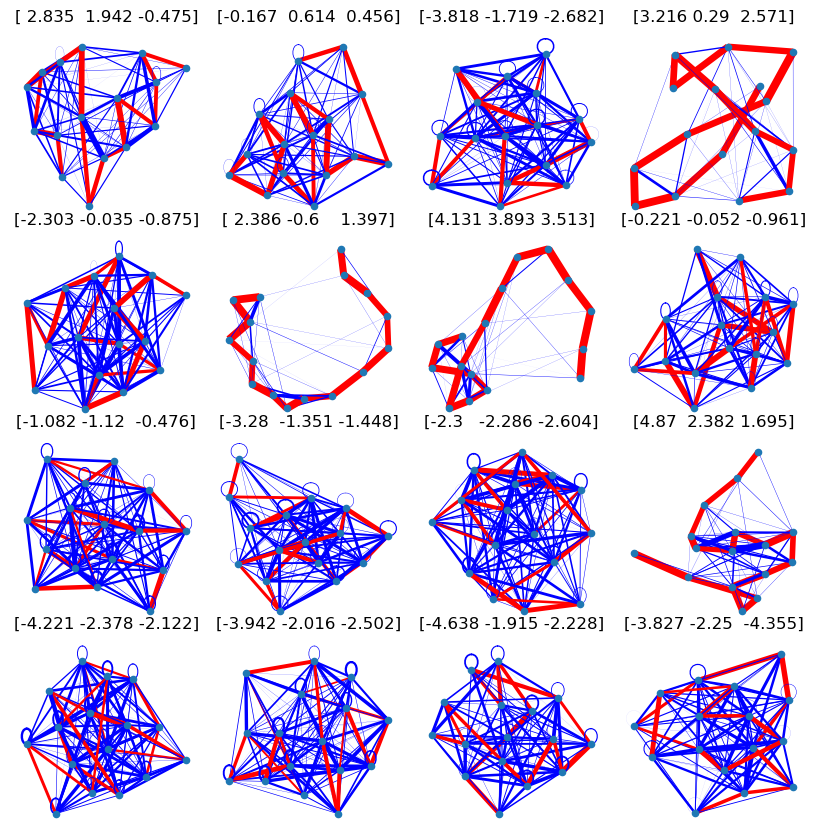

In [7]:
## Visualize dictionaries
display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_MIT_Harvard', W=W, regression_coeff=beta.T, fig_size=[10,10], plot_graph_only=True)

In [ ]:
### Harvard1, MIT8, Caltech36, UCLA26, 'bn-mouse_retina_1', 'bn-mouse-kasthuri_graph_v4'
path = "data/" + "Harvard1" + '.txt'
G3 = nn.NNetwork()
G3.load_add_edges(path, increment_weights=False, use_genfromtxt=True)

prob_ = sndl_predict(G3, W, beta, 500)

prob = np.insert(prob_, 0, 1-np.sum(prob_))
print(f"The predicted probability distribution: \n{prob}")